<a href="https://colab.research.google.com/github/nataliaboaventura/microplastic/blob/main/Marine_Microplastics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![](https://raw.githubusercontent.com/nataliaboaventura/microplastic/refs/heads/main/sea-2470908.jpg)
*Source: [Pixabay](https://pixabay.com/photos/sea-ocean-underwater-turtle-2470908/), Public Domain.*
#Exploring Microplastics in the Atlantic Ocean: Data Analysis and Insights
by *Natalia Boaventura*


The objective of this project is to explore Kaggle's dataset ["Marine Microplastics"](https://www.kaggle.com/datasets/william2020/marine-microplastics?resource=download&SSORegistrationToken=CfDJ8EnTcgNki7pNlcBNxcx19bsgzTpDM_RqiDGZsGaOUlZdCTG7WJ1TMWnQltiT6VmHxokRFTJPvsjF-6LWqziEnauehrYSXLbnZN-7B0yKPpUYeFrzWxHd02RBJ4C_U8bH6NOqB0WhJ6SXn3tul5yzqNUNOv9lcbqxzeXDLT7zNidLdz1N6QegQGQQxIKutTtiOkrWD1ZFOcVft4wrBRy3ujo3lPbjLkk-f_d4-C--L9sX50heY1qpEYm1jlj1Olfd-2UMCC4J4WX6OEJfNhblWEfutjVCsXUgEimrLWI4c1ZUXpjpeuOwhYWheuA1gpUFsek432taaBs5l5Fa4rjXBGH7zNlVuMafG9bPHydctAuuy_69kCU&DisplayName=Natalia). The Marine Microplastics database contains data on microplastic concentrations, collection locations, and sampling methods, aiming to improve water quality and protect coastal ecosystems.
Microplastics are a growing environmental concern, as they pose significant threats to marine life and ecosystems. By analyzing this dataset, the project aims to understand the distribution, sources, and impact of microplastics in the ocean. The exploration will involve cleaning and visualizing the data, identifying patterns, and possibly correlating the presence of microplastics with environmental factors such as water temperature, location, and pollution levels. The insights gained from this analysis could help in developing strategies for mitigating plastic pollution in the ocean.


## Importing libraries and performing the initial data readings


In [64]:
# Importing libraries
import pandas as pd
from tabulate import tabulate
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
import os

# Download latest version
path = kagglehub.dataset_download("william2020/marine-microplastics")

print("Path to dataset files:", path)


Path to dataset files: /root/.cache/kagglehub/datasets/william2020/marine-microplastics/versions/1


In [65]:
# Locating the CSV file within the downloaded folder
# Iterate through all files in the directory and find the first file ending with '.csv'
for file in os.listdir(path):
    if file.endswith(".csv"):
        csv_file_path = os.path.join(path, file)
        break

# Reading the CSV file and storing it in a DataFrame named 'df'
df = pd.read_csv(csv_file_path)

# Viewing the first 5 rows of the dataset
print(tabulate(df.head(), headers="keys", tablefmt="grid"))

+----+------------+----------------+-----------+--------------+-------------------+---------------+-----------+-----------------+-----------------+----------------------+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-------------------------------------------------+------------------------------------------------------------------------+-------------------------------------+--------------------+-----------------------------------------------------------------------------------------+------------+-------------+------------------------+--------------------------------------+-----------+------------+
|    |   OBJECTID | Oceans         |   Regions |   SubRegions | Sampling Method   |   Measurement | Unit  

## Overview of the DataFrame's general information


In [66]:
# Summary data for the dataset analysis
summary_data = [
    ["Total Rows", f"{df.shape[0]:,}"],
    ["Total Columns", f"{df.shape[1]:,}"],
    ["Missing Values", f"{df.isna().sum().sum():,}"],
    ["Duplicated Rows", f"{df.duplicated().sum():,}"],
    ["Duplicated Columns", f"{df.columns.duplicated().sum():,}"],
]

# Displaying an overview of the dataset in a table
print("Dataset Overview:")
print(tabulate(summary_data, headers=["Metric", "Value"], tablefmt="pretty"))  # Display table with metrics

Dataset Overview:
+--------------------+--------+
|       Metric       | Value  |
+--------------------+--------+
|     Total Rows     | 20,425 |
|   Total Columns    |   22   |
|   Missing Values   | 36,759 |
|  Duplicated Rows   |   0    |
| Duplicated Columns |   0    |
+--------------------+--------+


In [67]:
# Displaying detailed information about the dataset
print("Dataset Information:")
df.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20425 entries, 0 to 20424
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   OBJECTID          20425 non-null  int64  
 1   Oceans            20154 non-null  object 
 2   Regions           8885 non-null   object 
 3   SubRegions        1307 non-null   object 
 4   Sampling Method   20425 non-null  object 
 5   Measurement       14613 non-null  float64
 6   Unit              20425 non-null  object 
 7   Density Range     20425 non-null  object 
 8   Density Class     20425 non-null  object 
 9   Short Reference   20425 non-null  object 
 10  Long Reference    20425 non-null  object 
 11  DOI               20425 non-null  object 
 12  Organization      20425 non-null  object 
 13  Keywords          20407 non-null  object 
 14  Accession Number  20425 non-null  int64  
 15  Accession Link    20425 non-null  object 
 16  Latitude          2

In [68]:
# Displaying missing values for each column in a table
print("Missing Values per Column:")
print(
    tabulate(
        df.isnull().sum().reset_index().values,
        headers=["Column", "Missing Values"],  # Table headers
        tablefmt="pretty",  # Format for a visually appealing table
    )
)

Missing Values per Column:
+------------------+----------------+
|      Column      | Missing Values |
+------------------+----------------+
|     OBJECTID     |       0        |
|      Oceans      |      271       |
|     Regions      |     11540      |
|    SubRegions    |     19118      |
| Sampling Method  |       0        |
|   Measurement    |      5812      |
|       Unit       |       0        |
|  Density Range   |       0        |
|  Density Class   |       0        |
| Short Reference  |       0        |
|  Long Reference  |       0        |
|       DOI        |       0        |
|   Organization   |       0        |
|     Keywords     |       18       |
| Accession Number |       0        |
|  Accession Link  |       0        |
|     Latitude     |       0        |
|    Longitude     |       0        |
|       Date       |       0        |
|     GlobalID     |       0        |
|        x         |       0        |
|        y         |       0        |
+------------------+---

#Exploring and adjusting numeric data
[*in progress*]





In [69]:
# Understanding the "Measurement" column
print(df['Measurement'].describe())
measurement_counts = df['Measurement'].value_counts().reset_index()
measurement_counts.columns = ['Measurement', 'Count']
print(tabulate(measurement_counts.head(20), headers='keys', tablefmt='psql'))

count     14613.000000
mean        161.983976
std        2198.862484
min           0.000000
25%           0.000000
50%           0.008640
75%           0.128412
max      110480.000000
Name: Measurement, dtype: float64
+----+---------------+---------+
|    |   Measurement |   Count |
|----+---------------+---------|
|  0 |      0        |    4610 |
|  1 |      0.00216  |     536 |
|  2 |      0.00432  |     371 |
|  3 |      0.00648  |     232 |
|  4 |      0.0108   |     202 |
|  5 |      0.00864  |     199 |
|  6 |      0.001    |     113 |
|  7 |      0.0216   |     103 |
|  8 |      0.002    |     102 |
|  9 |      0.003    |      97 |
| 10 |      0.01728  |      93 |
| 11 |      0.01296  |      93 |
| 12 |   1410.44     |      82 |
| 13 |      0.01512  |      80 |
| 14 |      0.004    |      80 |
| 15 |      0.043196 |      75 |
| 16 |      0.0072   |      68 |
| 17 |      0.006    |      62 |
| 18 |      0.005    |      61 |
| 19 |      0.01944  |      61 |
+----+---------------+-

In [70]:
# Converting the 'Measurement' column to numeric and overwriting
df['Measurement'] = pd.to_numeric(df['Measurement'], errors='coerce')
print(tabulate(measurement_counts.head(20), headers='keys', tablefmt='psql'))
print(df['Measurement'].describe())

+----+---------------+---------+
|    |   Measurement |   Count |
|----+---------------+---------|
|  0 |      0        |    4610 |
|  1 |      0.00216  |     536 |
|  2 |      0.00432  |     371 |
|  3 |      0.00648  |     232 |
|  4 |      0.0108   |     202 |
|  5 |      0.00864  |     199 |
|  6 |      0.001    |     113 |
|  7 |      0.0216   |     103 |
|  8 |      0.002    |     102 |
|  9 |      0.003    |      97 |
| 10 |      0.01728  |      93 |
| 11 |      0.01296  |      93 |
| 12 |   1410.44     |      82 |
| 13 |      0.01512  |      80 |
| 14 |      0.004    |      80 |
| 15 |      0.043196 |      75 |
| 16 |      0.0072   |      68 |
| 17 |      0.006    |      62 |
| 18 |      0.005    |      61 |
| 19 |      0.01944  |      61 |
+----+---------------+---------+
count     14613.000000
mean        161.983976
std        2198.862484
min           0.000000
25%           0.000000
50%           0.008640
75%           0.128412
max      110480.000000
Name: Measurement, dtype

In [71]:
# Performing detailed analysis of the 'Density Range' column

print(f"{df['Density Range'].describe()}")
density_range_counts = df['Density Range'].value_counts().reset_index()
density_range_counts.columns = ['Density Range', 'Count']
print(tabulate(density_range_counts, headers='keys', tablefmt='psql'))

count       20425
unique         18
top       0.005-1
freq         6136
Name: Density Range, dtype: object
+----+-----------------+---------+
|    | Density Range   |   Count |
|----+-----------------+---------|
|  0 | 0.005-1         |    6136 |
|  1 | 0-0.0005        |    4485 |
|  2 | 2-40            |    2901 |
|  3 | 0.0005-0.005    |    1838 |
|  4 | 40-200          |    1346 |
|  5 | 1-10            |    1128 |
|  6 | 0               |    1017 |
|  7 | 1-2             |     403 |
|  8 | 500-30000       |     325 |
|  9 | >=10            |     313 |
| 10 | >200            |     233 |
| 11 | 20-150          |     102 |
| 12 | 0-100           |      97 |
| 13 | 0-2             |      41 |
| 14 | 2-20            |      36 |
| 15 | >40000          |      13 |
| 16 | 150-200         |       8 |
| 17 | 30000-40000     |       3 |
+----+-----------------+---------+


In [72]:
# Performing detailed analysis of the 'Density Class' column

print(f"{df['Density Class'].describe()}")
density_range_counts = df['Density Class'].value_counts().reset_index()
density_range_counts.columns = ['Density Class', 'Count']
print(tabulate(density_range_counts, headers='keys', tablefmt='psql'))

count      20425
unique         5
top       Medium
freq        9464
Name: Density Class, dtype: object
+----+-----------------+---------+
|    | Density Class   |   Count |
|----+-----------------+---------|
|  0 | Medium          |    9464 |
|  1 | Very Low        |    5640 |
|  2 | High            |    2485 |
|  3 | Low             |    2277 |
|  4 | Very High       |     559 |
+----+-----------------+---------+


In [75]:
# Function to extract numeric values and handle operators
def extract_numeric(value, operator=None):
    if pd.isna(value):
        return None
    value = value.strip()
    if operator and operator in value:
        try:
            return float(value.replace(operator, '').strip())  # Remove operator and convert to float
        except ValueError:
            return None
    try:
        return float(value)  # If no operator, convert directly
    except ValueError:
        return None

# Splitting 'Density Range' into Lower_Density, Upper_Density, and Operator
def split_density(value):
    if pd.isna(value):
        return None, None, None

    value = value.strip()
    # Check for ranges with '-' (e.g., "1.2 - 3.4")
    if '-' in value:
        try:
            lower, upper = value.split('-')
            return float(lower.strip()), float(upper.strip()), None
        except ValueError:
            return None, None, None

    # Check for operators and assign to the correct column
    for op in ['<=', '<', '>=', '>']:
        if op in value:
            if op in ['<', '<=']:
                return extract_numeric(value, op), None, op
            elif op in ['>', '>=']:
                return None, extract_numeric(value, op), op

    # Default case (no operator or range)
    return extract_numeric(value), None, None

# Apply the split_density function to create new columns
df[['Lower_Density', 'Upper_Density', 'Operator']] = df['Density Range'].apply(
    lambda x: pd.Series(split_density(x))
)

# Displaying the results for verification
print(tabulate(df[['Density Range', 'Lower_Density', 'Upper_Density', 'Operator']].head(), headers='keys', tablefmt='psql'))


+----+-----------------+-----------------+-----------------+------------+
|    | Density Range   |   Lower_Density |   Upper_Density | Operator   |
|----+-----------------+-----------------+-----------------+------------|
|  0 | 0.005-1         |          0.005  |          1      | nan        |
|  1 | 0-0.0005        |          0      |          0.0005 | nan        |
|  2 | 0.005-1         |          0.005  |          1      | nan        |
|  3 | >=10            |        nan      |         10      | >=         |
|  4 | 0.0005-0.005    |          0.0005 |          0.005  | nan        |
+----+-----------------+-----------------+-----------------+------------+


In [76]:
print(f"{df['Lower_Density'].describe()}\n")

print(f"{df['Upper_Density'].describe()}")

count    19866.000000
mean        15.957747
std        373.996101
min          0.000000
25%          0.000000
50%          0.005000
75%          1.000000
max      30000.000000
Name: Lower_Density, dtype: float64

count    19408.000000
mean       560.109513
std       4010.104871
min          0.000500
25%          0.005000
50%          1.000000
75%         40.000000
max      40000.000000
Name: Upper_Density, dtype: float64


# Incorporating Visualizations for Enhanced Data Understanding

*in progress*

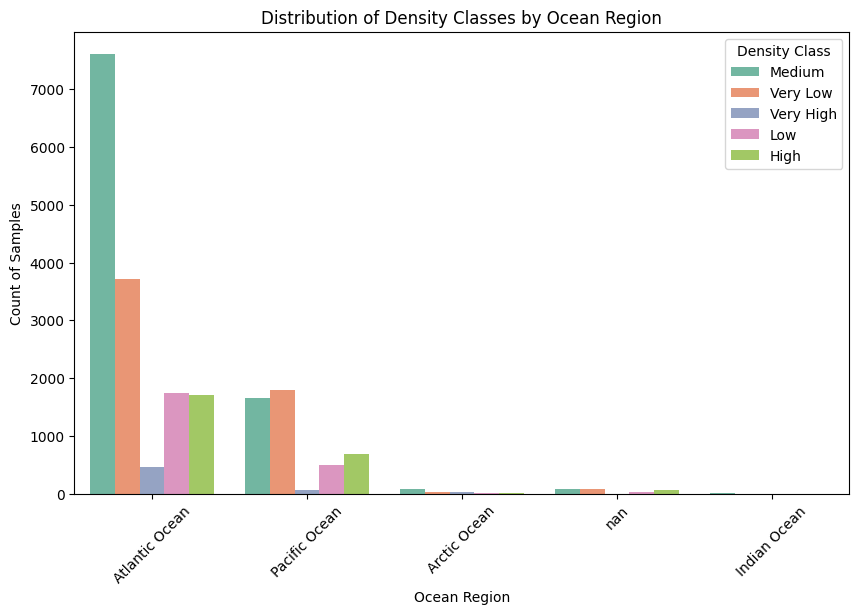

In [ ]:
df['Density Class'] = df['Density Class'].astype(str)
df['Oceans'] = df['Oceans'].astype(str)

# Plotting
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Oceans', hue='Density Class', palette='Set2')

plt.title('Distribution of Density Classes by Ocean Region')
plt.xlabel('Ocean Region')
plt.ylabel('Count of Samples')
plt.xticks(rotation=45)
plt.legend(title='Density Class', loc='upper right')
plt.show()

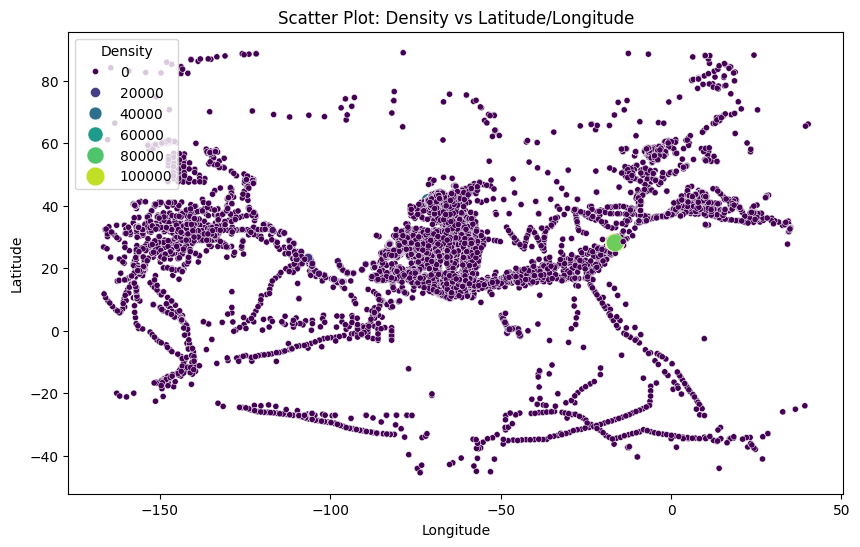

In [ ]:
plt.figure(figsize=(10,6))

sns.scatterplot(data=df, x='Longitude', y='Latitude', hue='Measurement', palette='viridis', size='Measurement', sizes=(20, 200))

plt.title('Scatter Plot: Density vs Latitude/Longitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Density', loc='upper left')
plt.show()

<ipython-input-62-e441f502e7d5>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


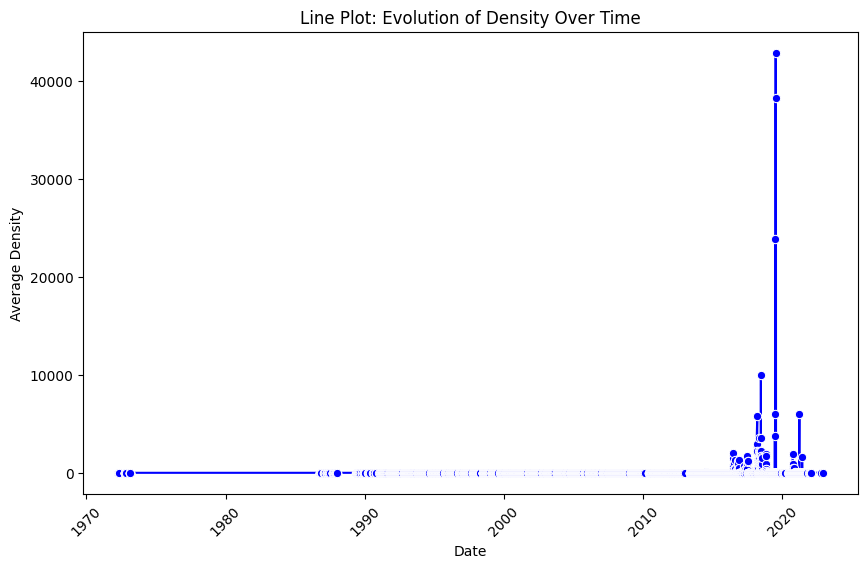

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

df_grouped = df.groupby('Date')['Measurement'].mean().reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(data=df_grouped, x='Date', y='Measurement', marker='o', color='b')

plt.title('Line Plot: Evolution of Density Over Time')
plt.xlabel('Date')
plt.ylabel('Average Density')
plt.xticks(rotation=45)
plt.show()